# ساخت یک مدل طبقه‌بندی: غذاهای خوشمزه آسیایی و هندی


## طبقه‌بندی‌کننده‌های آشپزی 1

در این درس، انواع مختلفی از طبقه‌بندی‌کننده‌ها را بررسی می‌کنیم تا *یک آشپزی ملی خاص را بر اساس گروهی از مواد اولیه پیش‌بینی کنیم.* در همین حال، درباره برخی از روش‌هایی که الگوریتم‌ها می‌توانند برای وظایف طبقه‌بندی استفاده شوند، بیشتر یاد خواهیم گرفت.

### [**آزمون پیش از درس**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/21/)

### **آمادگی**

این درس بر اساس [درس قبلی ما](https://github.com/microsoft/ML-For-Beginners/blob/main/4-Classification/1-Introduction/solution/lesson_10-R.ipynb) ساخته شده است که در آن:

-   یک معرفی ملایم به طبقه‌بندی‌ها با استفاده از یک مجموعه داده درباره تمام آشپزی‌های فوق‌العاده آسیا و هند 😋 داشتیم.

-   برخی از [افعال dplyr](https://dplyr.tidyverse.org/) را برای آماده‌سازی و پاک‌سازی داده‌ها بررسی کردیم.

-   با استفاده از ggplot2 تصاویر زیبایی ساختیم.

-   نشان دادیم که چگونه با داده‌های نامتعادل برخورد کنیم و آن‌ها را با استفاده از [recipes](https://recipes.tidymodels.org/articles/Simple_Example.html) پیش‌پردازش کنیم.

-   نشان دادیم که چگونه دستورالعمل خود را `prep` و `bake` کنیم تا تأیید کنیم که همان‌طور که باید کار می‌کند.

#### **پیش‌نیاز**

برای این درس، به بسته‌های زیر برای پاک‌سازی، آماده‌سازی و تصویرسازی داده‌ها نیاز داریم:

-   `tidyverse`: [tidyverse](https://www.tidyverse.org/) یک [مجموعه از بسته‌های R](https://www.tidyverse.org/packages) است که طراحی شده تا علم داده را سریع‌تر، آسان‌تر و سرگرم‌کننده‌تر کند!

-   `tidymodels`: چارچوب [tidymodels](https://www.tidymodels.org/) یک [مجموعه از بسته‌ها](https://www.tidymodels.org/packages/) برای مدل‌سازی و یادگیری ماشین است.

-   `themis`: بسته [themis](https://themis.tidymodels.org/) مراحل اضافی دستورالعمل‌ها برای برخورد با داده‌های نامتعادل را فراهم می‌کند.

-   `nnet`: بسته [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf) توابعی برای تخمین شبکه‌های عصبی پیش‌خور با یک لایه مخفی و مدل‌های رگرسیون لجستیک چندگانه فراهم می‌کند.

می‌توانید آن‌ها را به این صورت نصب کنید:


`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

به طور جایگزین، کد زیر بررسی می‌کند که آیا بسته‌های مورد نیاز برای تکمیل این ماژول را دارید یا خیر و در صورت نبودن، آن‌ها را برای شما نصب می‌کند.


In [2]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, themis, here)

Loading required package: pacman



## ۱. تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی

بیایید با انتخاب چند مرحله از درس قبلی شروع کنیم.

### حذف رایج‌ترین مواد اولیه‌ای که باعث ایجاد سردرگمی بین غذاهای مختلف می‌شوند، با استفاده از `dplyr::select()`.

همه عاشق برنج، سیر و زنجبیل هستند!


In [3]:
# Load the original cuisines data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger)) %>%
  # Encode cuisine column as categorical
  mutate(cuisine = factor(cuisine))

# Display new data set
df_select %>% 
  slice_head(n = 5)

# Display distribution of cuisines
df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

New names:
* `` -> ...1

Rows: 2448 Columns: 385

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


cuisine,n
<fct>,<int>
korean,799
indian,598
chinese,442
japanese,320
thai,289


عالی! حالا وقت آن رسیده که داده‌ها را تقسیم کنیم به‌طوری که ۷۰٪ داده‌ها برای آموزش و ۳۰٪ برای آزمایش استفاده شوند. همچنین از تکنیک `طبقه‌بندی` استفاده خواهیم کرد تا `تناسب هر نوع غذا` در مجموعه داده‌های آموزش و اعتبارسنجی حفظ شود.

[rsample](https://rsample.tidymodels.org/)، یک بسته در Tidymodels، زیرساختی برای تقسیم و نمونه‌گیری مجدد داده‌ها به‌صورت کارآمد فراهم می‌کند:


In [4]:
# Load the core Tidymodels packages into R session
library(tidymodels)

# Create split specification
set.seed(2056)
cuisines_split <- initial_split(data = df_select,
                                strata = cuisine,
                                prop = 0.7)

# Extract the data in each split
cuisines_train <- training(cuisines_split)
cuisines_test <- testing(cuisines_split)

# Print the number of cases in each split
cat("Training cases: ", nrow(cuisines_train), "\n",
    "Test cases: ", nrow(cuisines_test), sep = "")

# Display the first few rows of the training set
cuisines_train %>% 
  slice_head(n = 5)


# Display distribution of cuisines in the training set
cuisines_train %>% 
  count(cuisine) %>% 
  arrange(desc(n))

Training cases: 1712
Test cases: 736

cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


cuisine,n
<fct>,<int>
korean,559
indian,418
chinese,309
japanese,224
thai,202


## ۲. مقابله با داده‌های نامتوازن

همان‌طور که ممکن است در مجموعه داده اصلی و همچنین مجموعه آموزشی ما متوجه شده باشید، توزیع تعداد غذاها کاملاً نابرابر است. تعداد غذاهای کره‌ای تقریباً *سه برابر* غذاهای تایلندی است. داده‌های نامتوازن اغلب تأثیرات منفی بر عملکرد مدل دارند. بسیاری از مدل‌ها زمانی بهترین عملکرد را دارند که تعداد مشاهدات برابر باشد و به همین دلیل با داده‌های نامتوازن دچار مشکل می‌شوند.

دو روش اصلی برای مقابله با مجموعه داده‌های نامتوازن وجود دارد:

-   افزودن مشاهدات به کلاس اقلیت: `Over-sampling`، به عنوان مثال استفاده از الگوریتم SMOTE که به صورت مصنوعی نمونه‌های جدیدی از کلاس اقلیت را با استفاده از نزدیک‌ترین همسایگان این موارد تولید می‌کند.

-   حذف مشاهدات از کلاس اکثریت: `Under-sampling`

در درس قبلی، نشان دادیم که چگونه می‌توان با استفاده از یک `recipe` با مجموعه داده‌های نامتوازن مقابله کرد. یک recipe را می‌توان به عنوان یک نقشه راه در نظر گرفت که توضیح می‌دهد چه مراحلی باید روی یک مجموعه داده اعمال شود تا برای تحلیل داده آماده شود. در مورد ما، هدف این است که توزیع تعداد غذاها در مجموعه آموزشی ما برابر باشد. بیایید مستقیماً وارد موضوع شویم.


In [5]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing training data
cuisines_recipe <- recipe(cuisine ~ ., data = cuisines_train) %>% 
  step_smote(cuisine)

# Print recipe
cuisines_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor        380

Operations:

SMOTE based on cuisine

شما می‌توانید با استفاده از آماده‌سازی (prep) و پختن (bake) تأیید کنید که این دستورالعمل همان‌طور که انتظار دارید کار می‌کند - تمام برچسب‌های آشپزی دارای `559` مشاهده هستند.

از آنجایی که ما قصد داریم از این دستورالعمل به عنوان یک پیش‌پردازشگر برای مدل‌سازی استفاده کنیم، یک `workflow()` تمام مراحل آماده‌سازی و پخت را برای ما انجام می‌دهد، بنابراین نیازی نیست که دستورالعمل را به صورت دستی تخمین بزنیم.

حالا آماده‌ایم که یک مدل آموزش دهیم 👩‍💻👨‍💻!

## 3. انتخاب طبقه‌بند خود

<p >
   <img src="../../images/parsnip.jpg"
   width="600"/>
   <figcaption>اثر هنری از @allison_horst</figcaption>


حالا باید تصمیم بگیریم که از کدام الگوریتم برای این کار استفاده کنیم 🤔.

در Tidymodels، [`بسته parsnip`](https://parsnip.tidymodels.org/index.html) یک رابط کاربری یکپارچه برای کار با مدل‌ها در موتورهای مختلف (بسته‌ها) ارائه می‌دهد. لطفاً مستندات parsnip را بررسی کنید تا [انواع مدل‌ها و موتورهای آن‌ها](https://www.tidymodels.org/find/parsnip/#models) و همچنین [آرگومان‌های مدل](https://www.tidymodels.org/find/parsnip/#model-args) مربوطه را کشف کنید. تنوع موجود در ابتدا ممکن است کمی گیج‌کننده به نظر برسد. به عنوان مثال، روش‌های زیر همگی شامل تکنیک‌های طبقه‌بندی هستند:

-   مدل‌های طبقه‌بندی مبتنی بر قواعد C5.0

-   مدل‌های تفکیک‌پذیر انعطاف‌پذیر

-   مدل‌های تفکیک‌پذیر خطی

-   مدل‌های تفکیک‌پذیر منظم‌شده

-   مدل‌های رگرسیون لجستیک

-   مدل‌های رگرسیون چندجمله‌ای

-   مدل‌های بیز ساده

-   ماشین‌های بردار پشتیبان

-   نزدیک‌ترین همسایه‌ها

-   درخت‌های تصمیم‌گیری

-   روش‌های ترکیبی

-   شبکه‌های عصبی

این فهرست ادامه دارد!

### **کدام طبقه‌بند را انتخاب کنیم؟**

پس، کدام طبقه‌بند را باید انتخاب کنید؟ اغلب، امتحان کردن چندین مدل و جستجوی یک نتیجه خوب راهی برای آزمایش است.

> AutoML این مشکل را به‌خوبی حل می‌کند، زیرا این مقایسه‌ها را در فضای ابری اجرا می‌کند و به شما اجازه می‌دهد بهترین الگوریتم را برای داده‌های خود انتخاب کنید. آن را [اینجا امتحان کنید](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott)

همچنین انتخاب طبقه‌بند به مسئله ما بستگی دارد. به عنوان مثال، زمانی که نتیجه می‌تواند به `بیش از دو کلاس` دسته‌بندی شود، مانند مورد ما، باید از یک `الگوریتم طبقه‌بندی چندکلاسه` به جای `طبقه‌بندی دودویی` استفاده کنید.

### **یک رویکرد بهتر**

اما یک روش بهتر از حدس زدن تصادفی این است که از ایده‌های موجود در این [برگه تقلب یادگیری ماشین](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott) قابل دانلود پیروی کنید. در اینجا، متوجه می‌شویم که برای مسئله چندکلاسه ما، چندین گزینه داریم:

<p >
   <img src="../../images/cheatsheet.png"
   width="500"/>
   <figcaption>بخشی از برگه تقلب الگوریتم مایکروسافت که گزینه‌های طبقه‌بندی چندکلاسه را نشان می‌دهد</figcaption>


### **استدلال**

بیایید ببینیم چگونه می‌توانیم با توجه به محدودیت‌هایی که داریم، به روش‌های مختلفی فکر کنیم:

-   **شبکه‌های عصبی عمیق بسیار سنگین هستند.** با توجه به مجموعه داده‌های تمیز اما حداقلی ما و این واقعیت که آموزش به صورت محلی از طریق نوت‌بوک‌ها انجام می‌شود، شبکه‌های عصبی عمیق برای این کار بیش از حد سنگین هستند.

-   **از طبقه‌بند دوکلاسه استفاده نمی‌کنیم.** ما از یک طبقه‌بند دوکلاسه استفاده نمی‌کنیم، بنابراین روش one-vs-all کنار گذاشته می‌شود.

-   **درخت تصمیم یا رگرسیون لجستیک می‌توانند مناسب باشند.** یک درخت تصمیم ممکن است کار کند، یا رگرسیون چندجمله‌ای/رگرسیون لجستیک چندکلاسه برای داده‌های چندکلاسه.

-   **درخت‌های تصمیم تقویت‌شده چندکلاسه مسئله متفاوتی را حل می‌کنند.** درخت تصمیم تقویت‌شده چندکلاسه بیشتر برای وظایف غیرپارامتری مناسب است، مثلاً وظایفی که برای ایجاد رتبه‌بندی طراحی شده‌اند، بنابراین برای ما مفید نیست.

همچنین، معمولاً قبل از شروع به استفاده از مدل‌های پیچیده‌تر یادگیری ماشین مانند روش‌های ترکیبی، بهتر است ساده‌ترین مدل ممکن را بسازیم تا ایده‌ای از آنچه در حال وقوع است به دست آوریم. بنابراین برای این درس، ما با یک مدل `رگرسیون چندجمله‌ای` شروع خواهیم کرد.

> رگرسیون لجستیک یک تکنیک است که زمانی استفاده می‌شود که متغیر خروجی دسته‌ای (یا اسمی) باشد. در رگرسیون لجستیک دودویی تعداد متغیرهای خروجی دو است، در حالی که در رگرسیون لجستیک چندجمله‌ای تعداد متغیرهای خروجی بیش از دو است. برای مطالعه بیشتر به [روش‌های پیشرفته رگرسیون](https://bookdown.org/chua/ber642_advanced_regression/multinomial-logistic-regression.html) مراجعه کنید.

## 4. آموزش و ارزیابی یک مدل رگرسیون لجستیک چندجمله‌ای

در Tidymodels، تابع `parsnip::multinom_reg()` مدلی را تعریف می‌کند که از پیش‌بینی‌کننده‌های خطی برای پیش‌بینی داده‌های چندکلاسه با استفاده از توزیع چندجمله‌ای استفاده می‌کند. برای روش‌ها/موتورهای مختلفی که می‌توانید برای برازش این مدل استفاده کنید، به `?multinom_reg()` مراجعه کنید.

برای این مثال، ما یک مدل رگرسیون چندجمله‌ای را از طریق موتور پیش‌فرض [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf) برازش خواهیم داد.

> من مقدار `penalty` را به صورت تصادفی انتخاب کردم. روش‌های بهتری برای انتخاب این مقدار وجود دارد، مثلاً با استفاده از `بازنمونه‌گیری` و `تنظیم` مدل که بعداً درباره آن صحبت خواهیم کرد.
>
> اگر می‌خواهید درباره تنظیم ابرپارامترهای مدل بیشتر بدانید، به [Tidymodels: شروع به کار](https://www.tidymodels.org/start/tuning/) مراجعه کنید.


In [6]:
# Create a multinomial regression model specification
mr_spec <- multinom_reg(penalty = 1) %>% 
  set_engine("nnet", MaxNWts = 2086) %>% 
  set_mode("classification")

# Print model specification
mr_spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


آفرین 🥳! حالا که یک دستورالعمل و مشخصات مدل داریم، باید راهی پیدا کنیم که این دو را در قالب یک شیء ترکیب کنیم. این شیء ابتدا داده‌ها را پیش‌پردازش می‌کند، سپس مدل را روی داده‌های پیش‌پردازش‌شده برازش می‌دهد و همچنین امکان فعالیت‌های پس‌پردازشی را فراهم می‌کند. در Tidymodels، این شیء کاربردی [`workflow`](https://workflows.tidymodels.org/) نام دارد و به‌راحتی اجزای مدل‌سازی شما را در خود نگه می‌دارد! این همان چیزی است که در *پایتون* به آن *pipelines* می‌گوییم.

حالا بیایید همه چیز را در یک workflow جمع کنیم! 📦


In [7]:
# Bundle recipe and model specification
mr_wf <- workflow() %>% 
  add_recipe(cuisines_recipe) %>% 
  add_model(mr_spec)

# Print out workflow
mr_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


جریان‌های کاری 👌👌! یک **`workflow()`** می‌تواند تقریباً به همان روشی که یک مدل آموزش داده می‌شود، تنظیم شود. پس، وقت آموزش یک مدل است!


In [8]:
# Train a multinomial regression model
mr_fit <- fit(object = mr_wf, data = cuisines_train)

mr_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, decay = ~1, MaxNWts = ~2086, 
    trace = FALSE)

Coefficients:
         (Intercept)     almond angelica         anise anise_seed       apple
indian    0.19723325  0.2409661        0 -5.004955e-05 -0.1657635 -0.05769734
japanese  0.13961959 -0.6262400        0 -1.169155e-04 -0.4893596 -0.08585717
korean    0.22377347 -0.1833485        0 -5.560395e-05 -0.2489401 -0.15657804
thai     -0.04336577 -0.6106258        0  4.903828e-04 -0.5782866  0.63451105
         apple_brandy     apricot armagnac   artemisia artichoke   asparagus
indian              0  0.37042636        0 -0.09122797         0 -0.27181970
japanese            0

خروجی ضرایبی را نشان می‌دهد که مدل در طول آموزش یاد گرفته است.

### ارزیابی مدل آموزش‌دیده

حالا وقت آن است که ببینیم مدل چگونه عمل کرده است 📏 با ارزیابی آن روی یک مجموعه تست! بیایید با پیش‌بینی روی مجموعه تست شروع کنیم.


In [9]:
# Make predictions on the test set
results <- cuisines_test %>% select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test))

# Print out results
results %>% 
  slice_head(n = 5)

cuisine,.pred_class
<fct>,<fct>
indian,thai
indian,indian
indian,indian
indian,indian
indian,indian


کار عالی! در Tidymodels، ارزیابی عملکرد مدل می‌تواند با استفاده از [yardstick](https://yardstick.tidymodels.org/) انجام شود - بسته‌ای که برای اندازه‌گیری اثربخشی مدل‌ها با استفاده از معیارهای عملکرد استفاده می‌شود. همان‌طور که در درس رگرسیون لجستیک انجام دادیم، بیایید با محاسبه ماتریس سردرگمی شروع کنیم.


In [10]:
# Confusion matrix for categorical data
conf_mat(data = results, truth = cuisine, estimate = .pred_class)


          Truth
Prediction chinese indian japanese korean thai
  chinese       83      1        8     15   10
  indian         4    163        1      2    6
  japanese      21      5       73     25    1
  korean        15      0       11    191    0
  thai          10     11        3      7   70

هنگام کار با کلاس‌های متعدد، به طور کلی تجسم این به صورت یک نقشه حرارتی، مانند این، شهودی‌تر است:


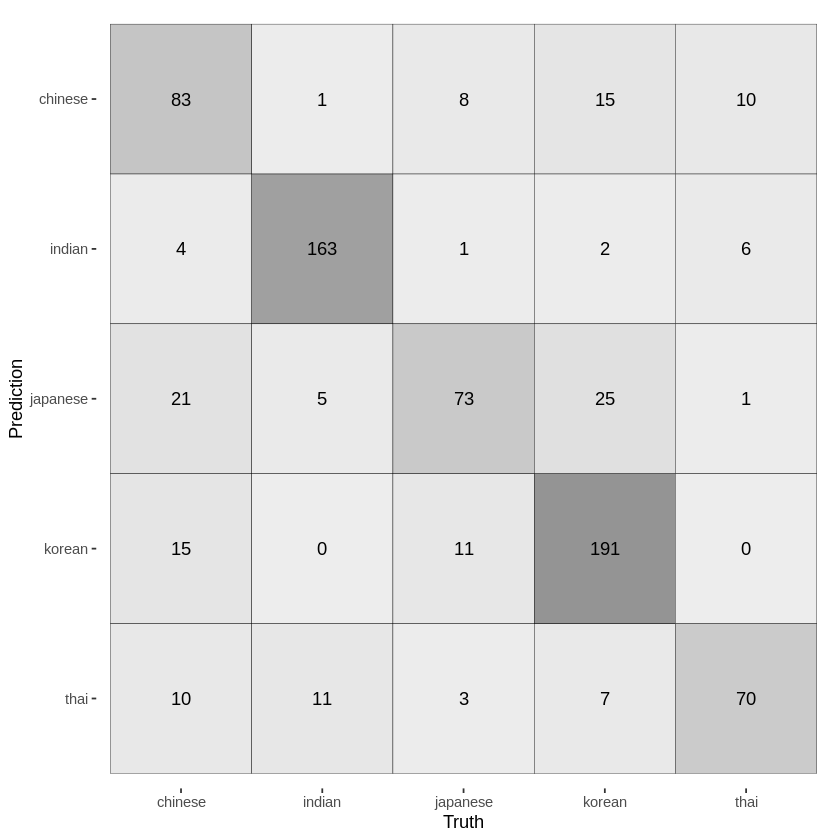

In [11]:
update_geom_defaults(geom = "tile", new = list(color = "black", alpha = 0.7))
# Visualize confusion matrix
results %>% 
  conf_mat(cuisine, .pred_class) %>% 
  autoplot(type = "heatmap")

مربع‌های تیره‌تر در نمودار ماتریس سردرگمی نشان‌دهنده تعداد بالای موارد هستند و امیدواریم یک خط مورب از مربع‌های تیره‌تر را ببینید که نشان‌دهنده مواردی است که در آن‌ها برچسب پیش‌بینی‌شده و واقعی یکسان هستند.

حالا بیایید آمار خلاصه‌ای برای ماتریس سردرگمی محاسبه کنیم.


In [12]:
# Summary stats for confusion matrix
conf_mat(data = results, truth = cuisine, estimate = .pred_class) %>% 
summary()

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7880435
kap,multiclass,0.7276583
sens,macro,0.7780927
spec,macro,0.9477598
ppv,macro,0.7585583
npv,macro,0.9460080
mcc,multiclass,0.7292724
j_index,macro,0.7258524
bal_accuracy,macro,0.8629262


اگر معیارهایی مانند دقت، حساسیت، و ppv را در نظر بگیریم، برای شروع وضعیت بدی نداریم 🥳!

## 4. بررسی عمیق‌تر

بیایید یک سؤال ظریف بپرسیم: چه معیارهایی برای انتخاب نوع خاصی از غذا به عنوان نتیجه پیش‌بینی‌شده استفاده می‌شود؟

خب، الگوریتم‌های یادگیری ماشین آماری، مانند رگرسیون لجستیک، بر اساس `احتمال` عمل می‌کنند؛ بنابراین چیزی که واقعاً توسط یک طبقه‌بند پیش‌بینی می‌شود، یک توزیع احتمالی بر روی مجموعه‌ای از نتایج ممکن است. کلاسی که بالاترین احتمال را دارد، به عنوان محتمل‌ترین نتیجه برای مشاهدات داده‌شده انتخاب می‌شود.

بیایید این را در عمل ببینیم، هم با پیش‌بینی‌های سخت کلاسی و هم با احتمالات.


In [13]:
# Make hard class prediction and probabilities
results_prob <- cuisines_test %>%
  select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test)) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test, type = "prob"))

# Print out results
results_prob %>% 
  slice_head(n = 5)

cuisine,.pred_class,.pred_chinese,.pred_indian,.pred_japanese,.pred_korean,.pred_thai
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,thai,1.551259e-03,0.4587877,5.988039e-04,2.428503e-04,5.388194e-01
indian,indian,2.637133e-05,0.9999488,6.648651e-07,2.259993e-05,1.577948e-06
indian,indian,1.049433e-03,0.9909982,1.060937e-03,1.644947e-05,6.874989e-03
indian,indian,6.237482e-02,0.4763035,9.136702e-02,3.660913e-01,3.863391e-03
indian,indian,1.431745e-02,0.9418551,2.945239e-02,8.721782e-03,5.653283e-03


✅ آیا می‌توانید توضیح دهید چرا مدل تقریباً مطمئن است که اولین مشاهده مربوط به غذاهای تایلندی است؟

## **🚀چالش**

در این درس، شما از داده‌های تمیز شده خود برای ساخت یک مدل یادگیری ماشین استفاده کردید که می‌تواند یک غذای ملی را بر اساس مجموعه‌ای از مواد اولیه پیش‌بینی کند. کمی زمان بگذارید و [گزینه‌های متنوعی](https://www.tidymodels.org/find/parsnip/#models) که Tidymodels برای طبقه‌بندی داده‌ها ارائه می‌دهد و [راه‌های دیگر](https://parsnip.tidymodels.org/articles/articles/Examples.html#multinom_reg-models) برای اجرای رگرسیون چندجمله‌ای را بررسی کنید.

#### تشکر ویژه از:

[`آلیسون هورست`](https://twitter.com/allison_horst/) برای خلق تصاویر شگفت‌انگیزی که R را جذاب‌تر و دلپذیرتر می‌کنند. تصاویر بیشتر را در [گالری او](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM) پیدا کنید.

[کسی بریویو](https://www.twitter.com/cassieview) و [جن لوپر](https://www.twitter.com/jenlooper) برای ایجاد نسخه اصلی پایتون این ماژول ♥️

<br>
می‌خواستم چند شوخی هم اضافه کنم، ولی راستش اصلاً از شوخی‌های غذایی سر در نمی‌آورم 😅.

<br>

یادگیری خوشایند،

[اریک](https://twitter.com/ericntay)، سفیر طلایی دانشجویی Microsoft Learn.



---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما برای دقت تلاش می‌کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادقتی‌هایی باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، ترجمه حرفه‌ای انسانی توصیه می‌شود. ما هیچ مسئولیتی در قبال سوءتفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
